In [466]:
import numpy as np
import matplotlib.pyplot as plt

In [467]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [468]:
class NeuralNetwork:
    def __init__(self, layer_sizes):
        '''initializes the weights and biases of the network'''
        self.num_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        self.weights = [np.random.rand(layer_sizes[i], layer_sizes[i+1]) for i in range(self.num_layers-1)]
        self.biases = [np.random.rand(layer_sizes[i+1]) for i in range(self.num_layers-1)]

    def forward(self, inputs):
        ''' forward pass through the network '''
        layer_outputs = []
        layer_inputs = inputs

        for i in range(self.num_layers - 1):
            weighted_sum = np.dot(layer_inputs, self.weights[i]) + self.biases[i]
            layer_output = sigmoid(weighted_sum)
            layer_outputs.append(layer_output)
            layer_inputs = layer_output

        return layer_outputs

    def predict(self, inputs):
        layer_outputs = self.forward(inputs)
        print("Result:",layer_outputs[-1])

        if layer_outputs[-1] > 0.5:
            return 1
        else:
            return 0
        
    def update_layer(self, layer, deltas, inputs, learning_rate):
        gradient = np.dot(inputs.T, deltas)
        self.weights[layer] -= learning_rate * gradient
        self.biases[layer] -= learning_rate * np.sum(deltas, axis=0)
        return self.weights[layer].copy(), self.biases[layer].copy()

    def train(self, inputs, targets, learning_rate, epochs):

        errors = []
        weights_track = []
        bias_track = []

        for _ in range(epochs):
            # calculate deltas
            deltas = []
            layer_outputs = self.forward(inputs)

            # output layer delta
            error = 0.5*(targets - layer_outputs[-1])**2
            #calculate average error
            errors.append(np.mean(error))

            delta = -(targets - layer_outputs[-1]) * sigmoid_derivative(layer_outputs[-1])
            deltas.append(delta)

            # hidden layer deltas
            for i in range(self.num_layers - 2, 1, -1):
                delta = np.dot(delta, self.weights[i].T) * sigmoid_derivative(layer_outputs[i-1])
                deltas.append(delta)

            # first hidden layer delta  
            delta = np.dot(deltas[-1], self.weights[1].T) * sigmoid_derivative(layer_outputs[0])
            deltas.append(delta)
            
            # update input layer weights
            deltas.reverse()
            w, b = (self.update_layer(0, deltas[0], inputs, learning_rate))

            # track weights and bias of input layer
            weights_track.append(w)
            bias_track.append(b)
            
            # update hidden layers weights and output layer weights
            for i in range(1, self.num_layers - 1):
                self.update_layer(i, deltas[i], layer_outputs[i - 1], learning_rate)
                
        return errors, weights_track, bias_track

## XOR

In [469]:
# layer_sizes defines the number of neurons in each layer
# so layer_sizes = [2, 5, 1] means 2 neurons in input layer, 5 neurons in hidden layer and 1 neuron in output layer
# you can change the number of neurons in each layer and see how the network performs
# for example: layer_sizes = [2, 10, 6, 1] or

layer_sizes = [2, 2, 1]


nn = NeuralNetwork(layer_sizes)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

err, wei, bi = nn.train(inputs, targets, 0.25, 5000)

for i in range(len(inputs)):
    print(f"Input: {inputs[i]}, Prediction: {nn.predict(inputs[i])}, Target: {targets[i]}")

Result: [0.04999813]
Input: [0 0], Prediction: 0, Target: [0]
Result: [0.95469435]
Input: [0 1], Prediction: 1, Target: [1]
Result: [0.9540852]
Input: [1 0], Prediction: 1, Target: [1]
Result: [0.04909738]
Input: [1 1], Prediction: 0, Target: [0]


### Error development over the epochs

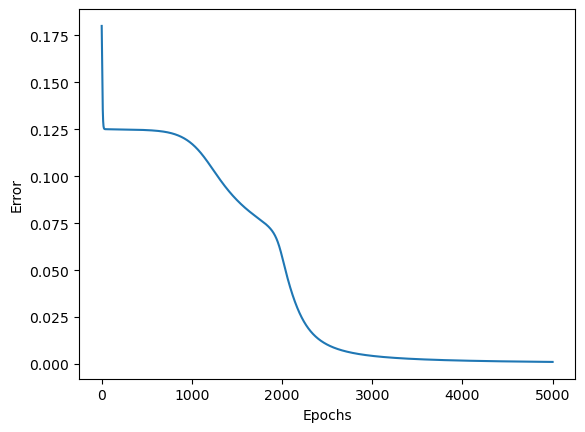

In [470]:
plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### Plot of the weights of the first layer perceptrons

##### Weight w1 

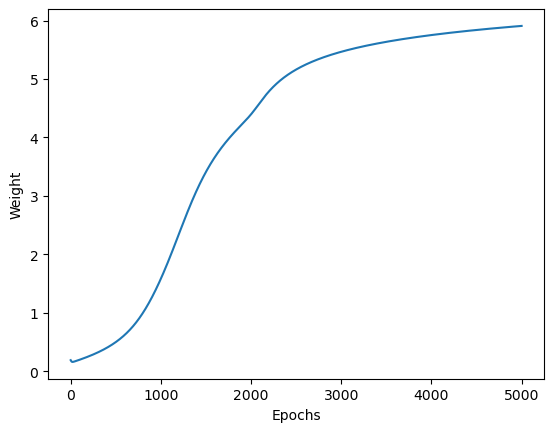

In [471]:
w1 = []
for i in range(len(wei)):
    w1.append(wei[i][0][0])

plt.plot(w1)   
plt.xlabel('Epochs')
plt.ylabel('Weight')
plt.show() 

##### Weight w2

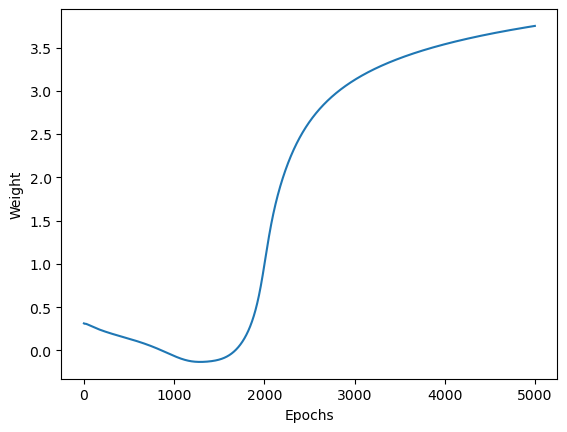

In [472]:
w2 = []
for i in range(len(wei)):
    w2.append(wei[i][0][1])

plt.plot(w2)
plt.xlabel('Epochs')
plt.ylabel('Weight')
plt.show()  

##### Bias

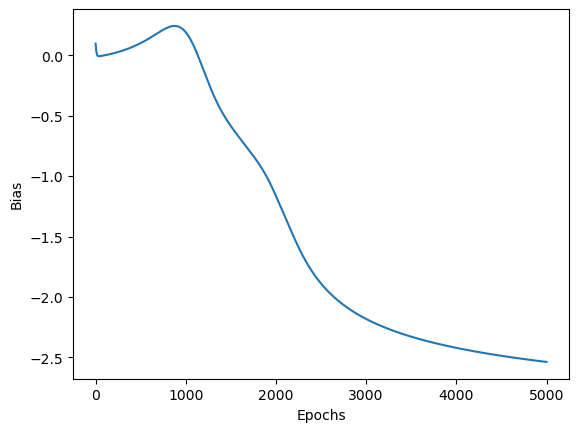

In [473]:
bi1 = []

for i in range(len(bi)):
    bi1.append(bi[i][0])

plt.plot(bi1)
plt.xlabel('Epochs')
plt.ylabel('Bias')
plt.show()

Export weights and biases

In [474]:
file_path = "weights_XOR.txt"

with open(file_path, "w") as f:
    for i in range(len(nn.weights)):
        f.write(f"Layer {i+1} weights:\n")
        f.write(f"{nn.weights[i]}\n")
        f.write(f"Layer {i+1} biases:\n")
        f.write(f"{nn.biases[i]}\n")
        f.write("\n")

## OR

In [475]:
layer_sizes = [2, 2, 1]
nn = NeuralNetwork(layer_sizes)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [1]])

err, wei, bi = nn.train(inputs, targets, 0.1, 1000)

for i in range(len(inputs)):
    print(f"Input: {inputs[i]}, Prediction: {nn.predict(inputs[i])}, Target: {targets[i]}")

Result: [0.3815871]
Input: [0 0], Prediction: 0, Target: [0]
Result: [0.80465906]
Input: [0 1], Prediction: 1, Target: [1]
Result: [0.80513093]
Input: [1 0], Prediction: 1, Target: [1]
Result: [0.90652564]
Input: [1 1], Prediction: 1, Target: [1]


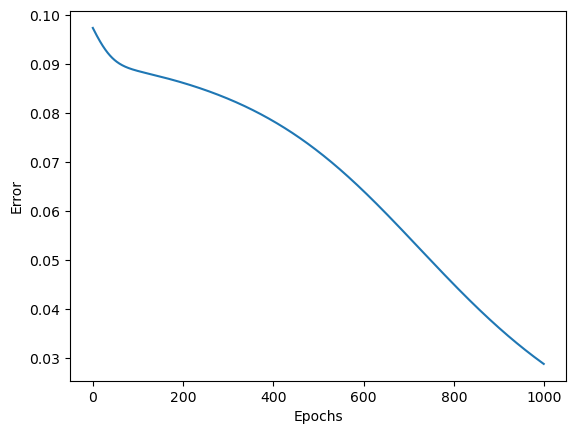

In [476]:
plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [477]:
file_path = "weights_OR.txt"

with open(file_path, "w") as f:
    for i in range(len(nn.weights)):
        f.write(f"Layer {i+1} weights:\n")
        f.write(f"{nn.weights[i]}\n")
        f.write(f"Layer {i+1} biases:\n")
        f.write(f"{nn.biases[i]}\n")
        f.write("\n")

## AND

In [478]:
layer_sizes = [2, 2, 1]
nn = NeuralNetwork(layer_sizes)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])

err, wei, bi = nn.train(inputs, targets, 0.25, 1000)

for i in range(len(inputs)):
    print(f"Input: {inputs[i]}, Prediction: {nn.predict(inputs[i])}, Target: {targets[i]}")

Result: [0.05492758]
Input: [0 0], Prediction: 0, Target: [0]
Result: [0.22581292]
Input: [0 1], Prediction: 0, Target: [0]
Result: [0.21971667]
Input: [1 0], Prediction: 0, Target: [0]
Result: [0.68440089]
Input: [1 1], Prediction: 1, Target: [1]


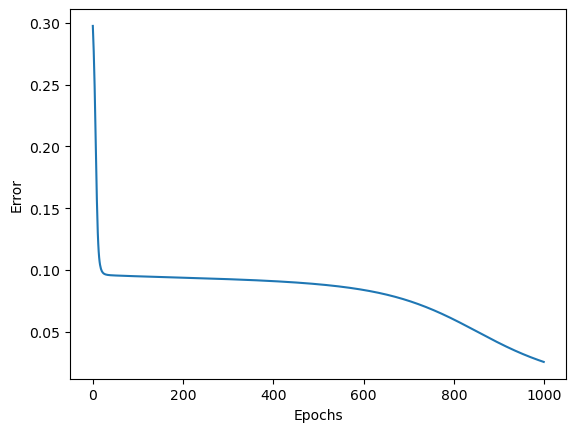

In [479]:
plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [480]:
file_path = "weights_AND.txt"

with open(file_path, "w") as f:
    for i in range(len(nn.weights)):
        f.write(f"Layer {i+1} weights:\n")
        f.write(f"{nn.weights[i]}\n")
        f.write(f"Layer {i+1} biases:\n")
        f.write(f"{nn.biases[i]}\n")
        f.write("\n")

## Donut

In [486]:
layer_sizes = [2, 3, 1]  # You can change the size and number of layers here

# Create the neural network
nn = NeuralNetwork(layer_sizes)

# donut shaped data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0.5,1], [1,0.5], [0.,0.5], [0.5,0],[0.5, 0.5]])
targets = np.array([[0], [0], [0], [0], [0], [0], [0], [0], [1]])

# Train the neural network
learning_rate = 0.75
epochs = 10000
err, wei, bi = nn.train(inputs, targets, learning_rate, epochs)

# Test the trained network
for i in range(len(inputs)):
    print(f"Input: {inputs[i]}, Prediction: {nn.predict(inputs[i])}, Target: {targets[i]}")

Result: [0.00216052]
Input: [0. 0.], Prediction: 0, Target: [0]
Result: [0.01556279]
Input: [0. 1.], Prediction: 0, Target: [0]
Result: [0.01482468]
Input: [1. 0.], Prediction: 0, Target: [0]
Result: [1.15438048e-05]
Input: [1. 1.], Prediction: 0, Target: [0]
Result: [0.01893177]
Input: [0.5 1. ], Prediction: 0, Target: [0]
Result: [4.56751443e-05]
Input: [1.  0.5], Prediction: 0, Target: [0]
Result: [0.00212389]
Input: [0.  0.5], Prediction: 0, Target: [0]
Result: [0.01926073]
Input: [0.5 0. ], Prediction: 0, Target: [0]
Result: [0.96707537]
Input: [0.5 0.5], Prediction: 1, Target: [1]


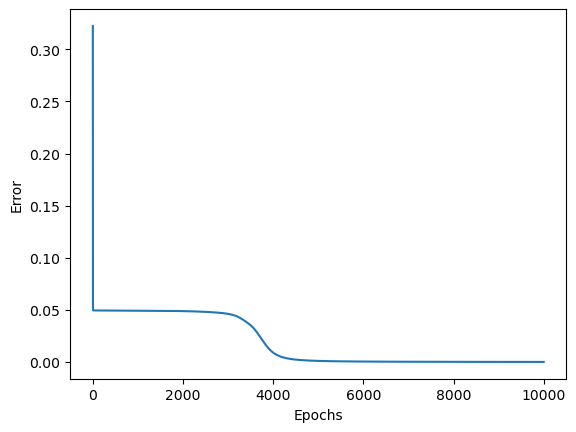

In [487]:
plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [488]:
file_path = "weights_Donut.txt"

with open(file_path, "w") as f:
    for i in range(len(nn.weights)):
        f.write(f"Layer {i+1} weights:\n")
        f.write(f"{nn.weights[i]}\n")
        f.write(f"Layer {i+1} biases:\n")
        f.write(f"{nn.biases[i]}\n")
        f.write("\n")